# DATA 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Création de la colone label

In [ ]:
df = pd.read_csv ('rotten_tomatoes_critic_reviews.csv ', sep =',')
dfClean. head (10)


In [ ]:
df = pd.read_csv ('rotten_tomatoes_movies.csv ', sep =',')
dfClean. head (10)

In [118]:
dfClean.review_score.unique()

array(['3.5/5', '1/4', 'B', '3/5', '4/5', '2/4', '2/5', 'C', '2.5/4',
       '3/4', 'C-', '2.75/5', 'B-', '2.5/5', '5.5/10', '1/5', 'C+', 'D+',
       '1.5/4', '6.5/10', '3/10', '1.5/5', '4/10', '7/10', '6/10', 'B+',
       '5/5', 'A-', '4.5/5', '5.78/10', '3.5/4', 'A', '9/10', '8.5/10',
       '4/4', '83/100', '8/10', '92/100', '82/100', '84/100', '10/10',
       'D-', 'F', '0.5/4', 'D', '5/10', '2/10', '2/6', '0.5/5', '0/4',
       '0/5', '76/100', '74/100', '86/100', '81/100', '56/100', '78/100',
       '2.25/5', '8.8/10', '0/10', '44/100', '2.75/4', '2.4/5', '8.6/10',
       '79/100', '80/100', '90/100', '66/100', '91/100', '0.3/5',
       '9.2/10', '2.7/5', '57/100', '4/6', '3/6', '73/100', '42/100',
       '65/100', '7.5/10', '4.5/10', '1/6', '70/100', '3.5/10', '71/100',
       '0.1/5', '3.25/10', '89/100', '40/100', '64/100', '62/100', '1/10',
       '3.75/5', '37/100', '5/6', '68/100', '60/100', '3.3/5', '77/100',
       '87/100', '5.25/10', '1.4/4', '75/100', '1.5/6', '85/100

In [2]:
def attribute_label(row):
        if float(row) <= 20 and float(row)>= 0:
            return 'VERY BAD'
        if float(row) <= 40 and float(row)>=20:
            return 'MID'
        if float(row) >= 40 and float(row) <= 60:
            return 'MID'
        if float(row) >= 60 and float(row) <= 80:
            return 'GOOD'
        if float(row) >= 80 and float(row) <= 100:
            return 'VERY GOOD'
        else :
            return 'Na' 
       

In [3]:
df = pd.read_csv ('rotten_tomatoes_critic_reviews.csv ', sep =',')
dfCleanTwo = df[df.review_content.notna()]
dfClean = dfCleanTwo[dfCleanTwo.review_score.notna()]

review_score_label = []   

i = 0
for index, rows in dfClean.review_score.iteritems():
    if '/5' in rows:
      rows = rows.split('/')[0]
      rows = float(rows) * 20
      review_score_label.append(attribute_label(rows))
    elif '/10' in rows:
      rows = rows.split('/')[0]
      rows = float(rows) * 10
      review_score_label.append(attribute_label(rows))
    elif '/4' in rows:
      rows = rows.split('/')[0]
      rows = float(rows) * 100 / 4
      review_score_label.append(attribute_label(rows))
    elif '/6' in rows:
      rows = rows.split('/')[0]
      rows = float(rows) * 100 / 6
      review_score_label.append(attribute_label(rows))
    elif '/20' in rows:
      rows = rows.split('/')[0]
      rows = float(rows) * 5
      review_score_label.append(attribute_label(rows))
    elif 'A' in rows or 'B' in rows or 'C' in rows or 'D' in rows or 'E' in rows or 'F' in rows:
      rows = 90 if 'A' in rows else 75 if 'B' in rows else 50 if 'C' in rows else 25 if 'D' in rows else 10 if 'E' in rows else 0 if 'F' in rows else 'Na'
      review_score_label.append(attribute_label(rows))
    else:
      review_score_label.append('Na')
    
dfClean.insert(8, "review_score_label", review_score_label, True)


In [117]:
dfClean.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content,review_score_label
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...,GOOD
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...,MID
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ...",GOOD
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative",GOOD
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an...",MID


# Calcul du tf idf pour l'attribut "GOOD"


In [ ]:
# dense to sparse
from numpy import array
from scipy.sparse import csr_matrix



In [4]:
corpusGoodIndex = []

for index, rows in dfClean.review_score_label.iteritems():
    if rows == 'GOOD':
        corpusGoodIndex.append(1)
    else:
        corpusGoodIndex.append(0)   


In [5]:
listText=[]

for index, element in dfClean.review_content.iteritems():
    listText.append(element)


In [6]:
listTextGood = []
for idx,value in enumerate(corpusGoodIndex):
    if value == 1 and listText[idx] != np.nan:
        listTextGood.append(listText[idx])
        


  


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [19]:

answerGood = tfidf.fit_transform(listTextGood)


In [20]:
tfidf.vocabulary_

{'whether': 72903,
 'audiences': 4588,
 'will': 73230,
 'get': 27446,
 'behind': 6194,
 'the': 66463,
 'lightning': 38488,
 'thief': 66598,
 'is': 34812,
 'hard': 29812,
 'to': 67224,
 'predict': 51132,
 'overall': 47120,
 'it': 34898,
 'an': 2735,
 'entertaining': 21824,
 'introduction': 34473,
 'promising': 51858,
 'new': 44859,
 'world': 73738,
 'but': 9281,
 'consuming': 13845,
 'shadow': 59191,
 'of': 46114,
 'potter': 50872,
 'be': 5909,
 'too': 67415,
 'big': 6741,
 'break': 8355,
 'free': 26075,
 'percy': 48869,
 'jackson': 35026,
 'isn': 34860,
 'great': 28611,
 'movie': 43568,
 'good': 28158,
 'one': 46384,
 'trotting': 68430,
 'out': 46907,
 'kernels': 36350,
 'greek': 28626,
 'mythology': 44140,
 'like': 38508,
 'so': 61385,
 'many': 40397,
 'disney': 18569,
 'channel': 10875,
 'references': 54278,
 'fun': 26488,
 'brisk': 8572,
 'and': 2830,
 'imaginative': 32530,
 'this': 66647,
 'action': 1175,
 'packed': 47584,
 'fantasy': 23793,
 'adventure': 1495,
 'based': 5687,
 'on

In [21]:
feature_names = tfidf.get_feature_names()
print(feature_names)

['00', '000', '000th', '001', '007', '007er', '007s', '008', '00s', '02', '04', '044', '05', '06', '08', '09', '10', '100', '1000', '1001', '100k', '100m', '100million', '100th', '100ths', '101', '101st', '102', '103', '103rd', '104', '105', '1052', '106', '107', '108', '109', '10lb', '10s', '10th', '10x10', '11', '110', '1100', '110th', '111', '112', '113', '1135', '1138', '114', '115', '116', '1160', '117', '118', '1186', '119', '1192', '11th', '12', '120', '1200', '121', '122', '123', '124', '125', '126', '127', '128', '129', '12a', '12ft', '12s', '12th', '13', '130', '130bpm', '130th', '131', '132', '133', '134', '1348', '135', '136', '137', '138', '1380', '139', '13th', '13ths', '14', '140', '1408', '1409', '141', '142', '143', '144', '145', '146', '147', '148', '149', '14a', '14th', '15', '150', '151', '152', '153', '154', '155mph', '156', '157', '158', '158min', '15th', '16', '160', '1600', '1600s', '161', '162', '162nd', '163', '164', '165', '166', '1665', '167', '168', '16mm',

In [22]:
feature_names = tfidf.get_feature_names()
for col in answerGood.nonzero()[1]:
    print(feature_names[col], '-', answerGood[0,col])


free - 0.19788879810968854
break - 0.20473894336501164
big - 0.1483961991760238
too - 0.13131739845926077
be - 0.09805893453977726
potter - 0.21748570949903553
of - 0.10128201652967302
shadow - 0.23136616148508873
consuming - 0.27775681568575855
but - 0.0766666590894446
world - 0.14122970840168356
new - 0.1395002305614832
promising - 0.22372204533715342
introduction - 0.23306094438141745
entertaining - 0.13647098363743793
an - 0.08783239721424389
it - 0.06292295713560371
overall - 0.18736195088399188
predict - 0.2798679216640639
to - 0.1783160464166371
hard - 0.1547941555816931
is - 0.060206845250133735
thief - 0.27179587765312896
lightning - 0.2581587655414082
the - 0.08444804632313731
behind - 0.1798625945537498
get - 0.14344412846676236
will - 0.24654093606197486
audiences - 0.17777719636229644
whether - 0.18993382853374213
references - 0.0
channel - 0.0
disney - 0.0
many - 0.0
so - 0.0
like - 0.0
mythology - 0.0
greek - 0.0
kernels - 0.0
out - 0.0
trotting - 0.0
one - 0.0
good - 0.

KeyboardInterrupt: 

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer


In [77]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(listTextGood)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df)

                 TF-IDF
predict        0.279868
consuming      0.277757
thief          0.271796
lightning      0.258159
will           0.246541
...                 ...
flamin         0.000000
flamethrowing  0.000000
flamethrower   0.000000
flames         0.000000
ﬁght           0.000000

[74817 rows x 1 columns]


# Word Cloud pour l'attribut "GOOD"

In [11]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [ ]:
  
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

#Content-related
text = open('batman.txt', 'r').read()
stopwords = set(STOPWORDS)

#Appearance-related
custom_mask = np.array(Image.open('batman.png')) 
wc = WordCloud(background_color = 'white',
               stopwords = stopwords,
               mask = custom_mask,
               contour_width = 3,
               contour_color = 'black')

wc.generate(text)
image_colors = ImageColorGenerator(custom_mask)
wc.recolor(color_func = image_colors)

#Plotting
##plt.imshow(wc, interpolation = 'bilinear')
##plt.axis('off')
##plt.show()

wc.to_file('Batman_wordcloud.png')

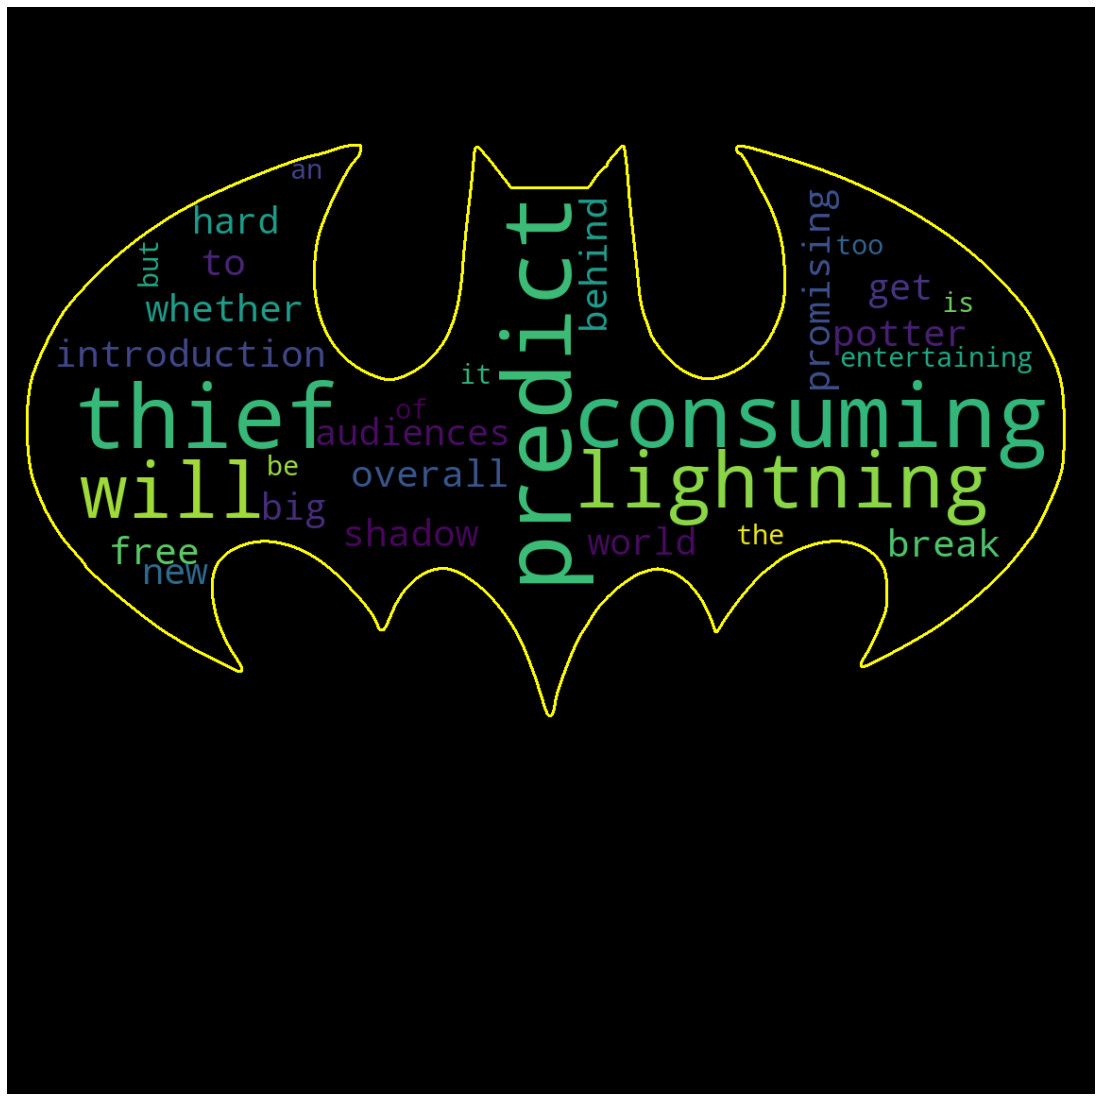

In [100]:
  
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image

#Content-related
ban = ['to','of', 'will']
stopwords = set(STOPWORDS)
for element in ban : 
    stopwords.add(element) # j'enlève les mots pas intéressant



#Appearance-related
custom_mask = np.array(Image.open('batman.png'))
wc = WordCloud( max_font_size=100,relative_scaling=0,background_color='black',max_words=4000,mask = custom_mask ,  stopwords = stopwords, contour_width=3, contour_color='yellow').generate_from_frequencies(df['TF-IDF'])



plt.figure(figsize=[30,20])
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()


# Même chose avec l'ensemble des reviews

In [109]:
# dense to sparse
from numpy import array
from scipy.sparse import csr_matrix



In [110]:
listText=[]
for index, element in dfClean.review_content.iteritems():
    listText.append(element)

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [113]:
answer = tfidf.fit_transform(listText)

In [114]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfTransformer

In [115]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(listText)
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)
print (df)

                TF-IDF
consuming     0.282972
predict       0.273918
thief         0.267329
lightning     0.255625
will          0.246712
...                ...
flattest      0.000000
flattery      0.000000
flatters      0.000000
flatteringly  0.000000
ﬁlm           0.000000

[108699 rows x 1 columns]


(-0.5, 454.5, 454.5, -0.5)

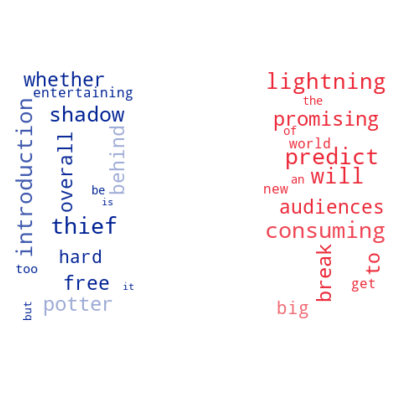

In [116]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt #to display our wordcloud
from PIL import Image #to load our image
import numpy as np #to get the color of our image



mask = np.array(Image.open("france.png"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate_from_frequencies(df['TF-IDF'])


image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

